In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy import stats
from scipy.stats import truncnorm

df = pd.read_csv("./Titanic-Dataset.csv.xls")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#Problem 1

# Q1

In [2]:

print(df.shape)
'''
Rows - Details of each Passenger on the ship.
Columns - Specific Features of each passenger such as their Name,Age, where were they located on the ship.
'''

(891, 12)


'\nRows - Details of each Passenger on the ship.\nColumns - Specific Features of each passenger such as their Name,Age, where were they located on the ship.\n'

# Column Names

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Q2

In [4]:
#Summary statistics for Age, Fare, SibSp, Parch
#we will use describe to describe the columns of the dataset.
summary_statistics_Age = df['Age'].describe()
summary_statistics_Fare = df['Fare'].describe()
summary_statistics_SibSp = df['SibSp'].describe()
summary_statistics_Parch = df['Parch'].describe()

print("Age Stats: \n",summary_statistics_Age,"\nFare Stats: \n", summary_statistics_Fare, "\nSibling/Spouses Stats: \n", summary_statistics_SibSp,"\nParent/Child Stats: \n", summary_statistics_Parch)
#print(summary_statistics_Fare)
#print(summary_statistics_SibSp)
#print(summary_statistics_Parch)

Age Stats: 
 count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64 
Fare Stats: 
 count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64 
Sibling/Spouses Stats: 
 count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64 
Parent/Child Stats: 
 count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64


# Q3

In [22]:
#Here we find the missing value in our dataset and formulate a table to give us the % of null values too
missing_count = df.isnull().sum().values
missing_percent = 100 * missing_count / len(df)
print(missing_count)
print(missing_percent)
print(df.columns)

[  0   0   0   0   0 177   0   0   0   0 687   2]
[ 0.          0.          0.          0.          0.         19.86531987
  0.          0.          0.          0.         77.1043771   0.22446689]
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [6]:
'''For the table -we need
1.Variable name - done
2.Number of msissing values - done
3.Percentage

variable name - df.columns
Number of missing values: Store the missing value count in a new variable..
Percentage of missing values : missing values / total values * 100
'''

table = pd.DataFrame({'Columns':df.columns,'Count':missing_count,'missing_percent':missing_percent})
print(table)

        Columns  Count  missing_percent
0   PassengerId      0         0.000000
1      Survived      0         0.000000
2        Pclass      0         0.000000
3          Name      0         0.000000
4           Sex      0         0.000000
5           Age    177        19.865320
6         SibSp      0         0.000000
7         Parch      0         0.000000
8        Ticket      0         0.000000
9          Fare      0         0.000000
10        Cabin    687        77.104377
11     Embarked      2         0.224467


#Problem 2

# Q4

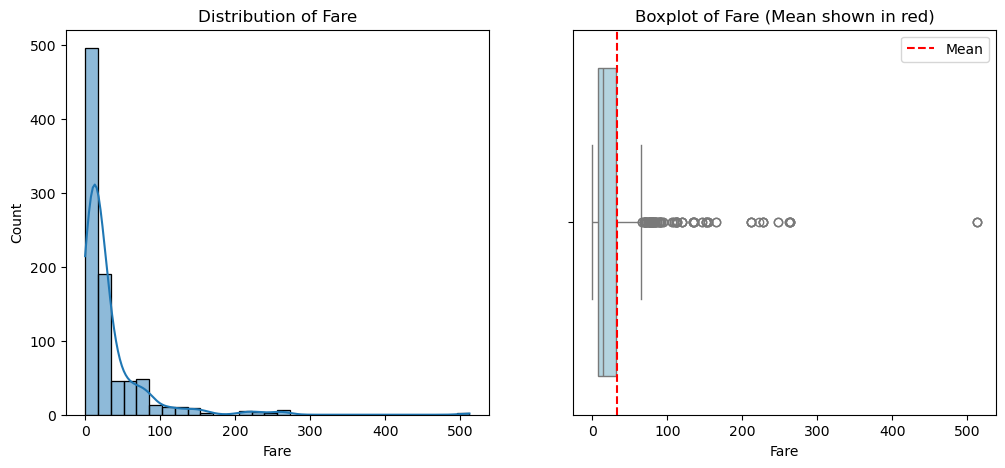

Fare: n = 891, Mean = 32.20, Median = 14.45


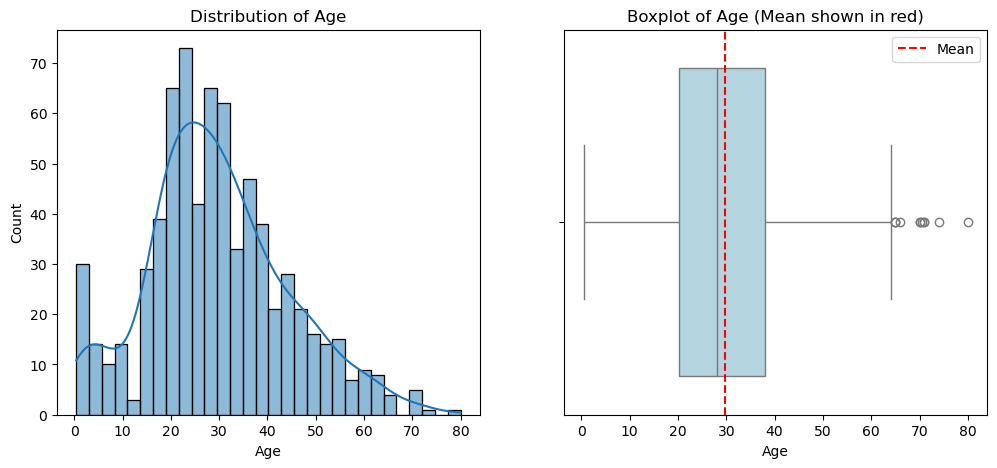

Age: n = 714, Mean = 29.70, Median = 28.00


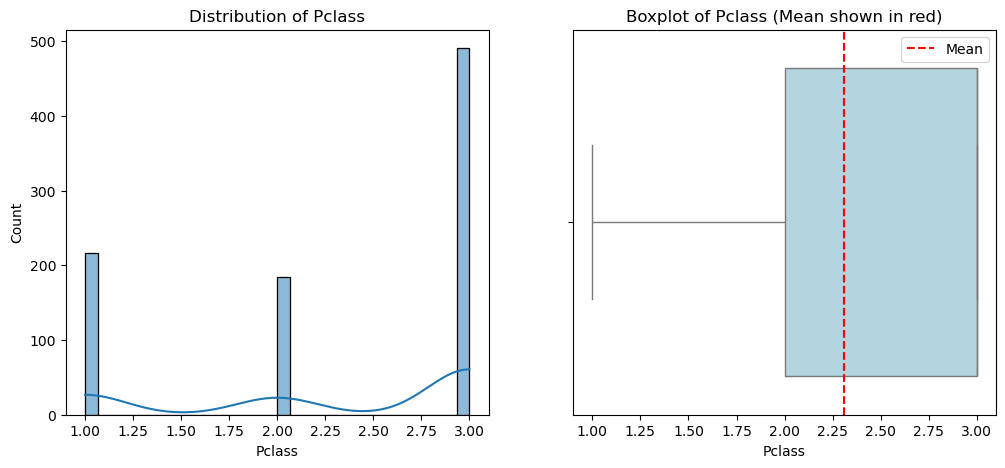

Pclass: n = 891, Mean = 2.31, Median = 3.00


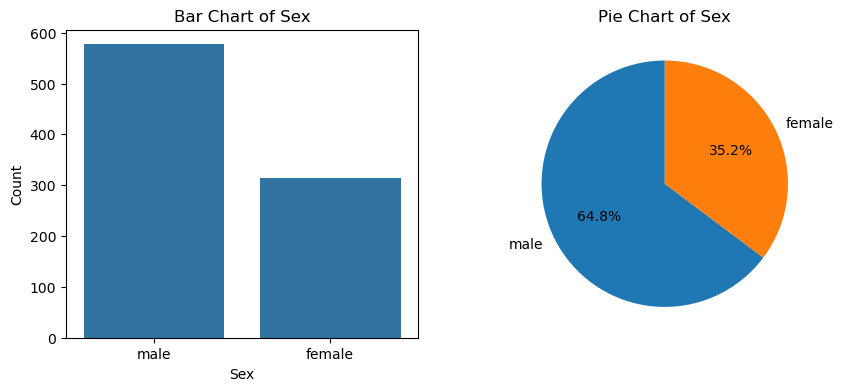

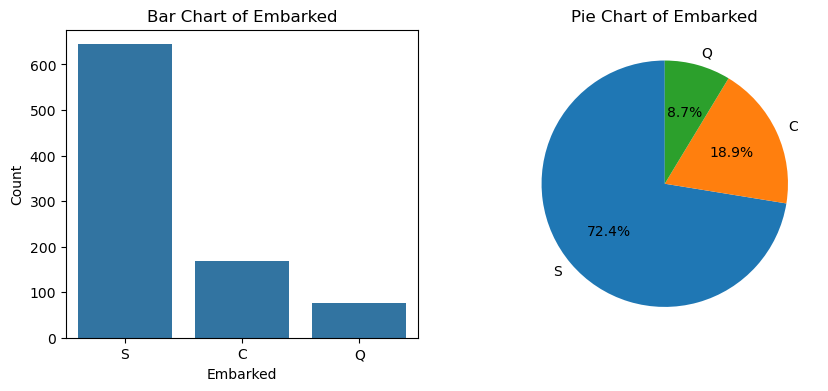

In [7]:
numeric_vars = ['Fare', 'Age', 'Pclass']
categorical_vars = ['Sex', 'Embarked']

# Numeric variable plots
for var in numeric_vars:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[var].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of {var}")
    plt.xlabel(var)
    plt.ylabel("Count")

    # Boxplot with mean
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[var], color='lightblue')
    mean_val = df[var].mean()
    plt.axvline(mean_val, color='red', linestyle='--', label='Mean')
    plt.legend()
    plt.title(f"Boxplot of {var} (Mean shown in red)")
    plt.xlabel(var)
    plt.show()

    print(f"{var}: n = {df[var].count()}, Mean = {mean_val:.2f}, Median = {df[var].median():.2f}")

# Categorical variable plots
for var in categorical_vars:
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    sns.countplot(x=df[var])
    plt.title(f"Bar Chart of {var}")
    plt.xlabel(var)
    plt.ylabel("Count")

    plt.subplot(1, 2, 2)
    df[var].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f"Pie Chart of {var}")
    plt.ylabel("")
    plt.show()

# Q5

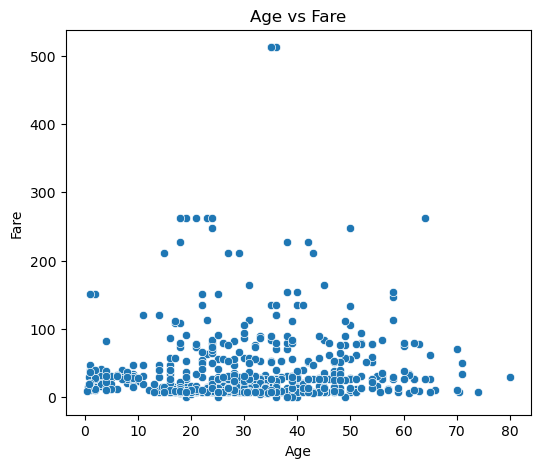

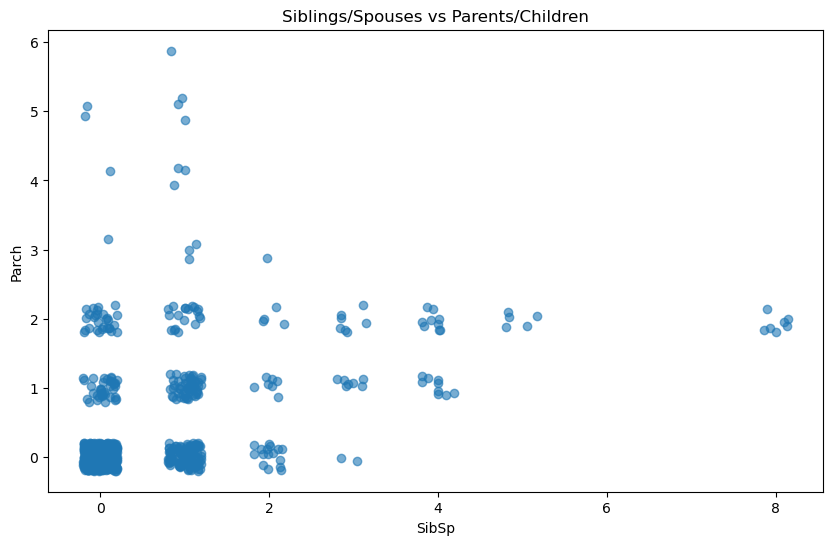

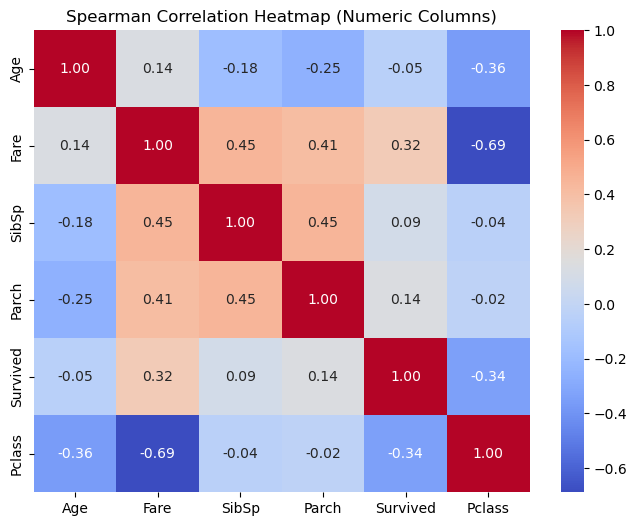

Spearman correlation matrix (Numeric Columns):
                Age      Fare     SibSp     Parch  Survived    Pclass
Age       1.000000  0.135051 -0.182061 -0.254212 -0.052565 -0.361666
Fare      0.135051  1.000000  0.447113  0.410074  0.323736 -0.688032
SibSp    -0.182061  0.447113  1.000000  0.450014  0.088879 -0.043019
Parch    -0.254212  0.410074  0.450014  1.000000  0.138266 -0.022801
Survived -0.052565  0.323736  0.088879  0.138266  1.000000 -0.339668
Pclass   -0.361666 -0.688032 -0.043019 -0.022801 -0.339668  1.000000


In [8]:
#Plotting a scatter plot - taking into consideration the spearman coefficient.
plt.figure(figsize=(6, 5))
sns.scatterplot(x='Age', y='Fare', data=df)
plt.title("Age vs Fare")
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(x='SibSp', y='Parch', data=df, fit_reg=False, x_jitter=0.2, y_jitter=0.2, scatter_kws={'alpha':0.6})
plt.title("Siblings/Spouses vs Parents/Children")
plt.show()

# Spearman correlation matrix for numeric columns only
numeric_df = df[["Age","Fare","SibSp","Parch","Survived","Pclass"]]
corr_matrix = numeric_df.corr(method='spearman')
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Spearman Correlation Heatmap (Numeric Columns)")
plt.show()

print("Spearman correlation matrix (Numeric Columns):\n", corr_matrix)

# Q6

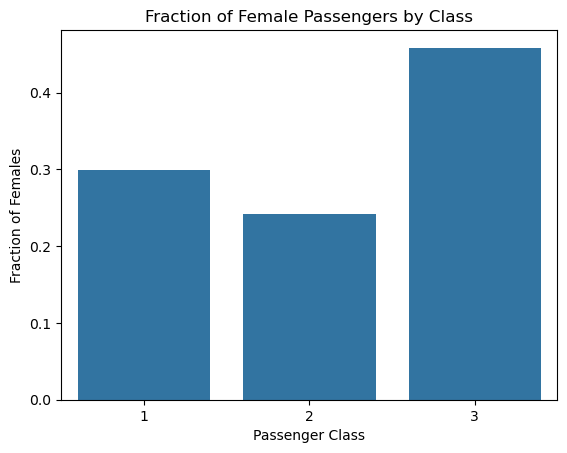

Fraction of Female Passengers by Class:
 Pclass
1    0.299363
2    0.242038
3    0.458599
Name: proportion, dtype: float64


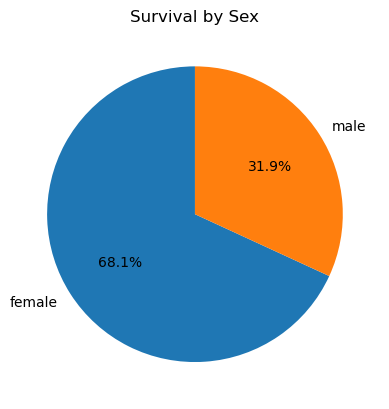

In [9]:
# Fraction of female passengers by class
female_class = df[df['Sex'] == 'female']['Pclass'].value_counts(normalize=True).sort_index()
sns.barplot(x=female_class.index, y=female_class.values)
plt.title("Fraction of Female Passengers by Class")
plt.xlabel("Passenger Class")
plt.ylabel("Fraction of Females")
plt.show()

print("Fraction of Female Passengers by Class:\n", female_class)

# Additional categorical comparison — survival by sex (pie chart)
if 'Survived' in df.columns:
    survival_by_sex = df[df['Survived'] == 1]['Sex'].value_counts()
    survival_by_sex.plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title("Survival by Sex")
    plt.ylabel("")
    plt.show()
else:
    print("Column 'Survived' not found — skipping survival pie chart.")

# Problem 3

# Q7

In [23]:
#PREPROCESSING PIPELINE
#1.Removing noisy/irrelevant Columns
df1 = df.drop(['PassengerId','Name','Cabin','Pclass','Ticket'],axis=1)
df1.isnull().sum()
df1 = df1.dropna(subset=['Embarked'])
df1.isnull().sum()

print(" Original Data ")
df_imputed = df1.copy()
print(df_imputed)

# 2. Perform Random Sample Imputation

# Get all the non-missing (observed) values
observed_values = df_imputed['Age'].dropna()

# Get the number of missing values
num_missing = df_imputed['Age'].isnull().sum()

# Generate random samples from the observed values
# We use 'replace=True' in case we need to fill more NaNs
# than we have observed values.
random_samples = observed_values.sample(num_missing, replace=True)

# Get the indices (row numbers) of the missing values
missing_indices = df_imputed[df_imputed['Age'].isnull()].index

# Fill the NaNs by assigning the random samples to the correct indices
# We use .values to ignore the index of 'random_samples'
df_imputed.loc[missing_indices, 'Age'] = random_samples.values

print("\n Imputed Data ")
print(df_imputed)

 Original Data 
     Survived     Sex   Age  SibSp  Parch     Fare Embarked
0           0    male  22.0      1      0   7.2500        S
1           1  female  38.0      1      0  71.2833        C
2           1  female  26.0      0      0   7.9250        S
3           1  female  35.0      1      0  53.1000        S
4           0    male  35.0      0      0   8.0500        S
..        ...     ...   ...    ...    ...      ...      ...
886         0    male  27.0      0      0  13.0000        S
887         1  female  19.0      0      0  30.0000        S
888         0  female   NaN      1      2  23.4500        S
889         1    male  26.0      0      0  30.0000        C
890         0    male  32.0      0      0   7.7500        Q

[889 rows x 7 columns]

 Imputed Data 
     Survived     Sex   Age  SibSp  Parch     Fare Embarked
0           0    male  22.0      1      0   7.2500        S
1           1  female  38.0      1      0  71.2833        C
2           1  female  26.0      0      0   

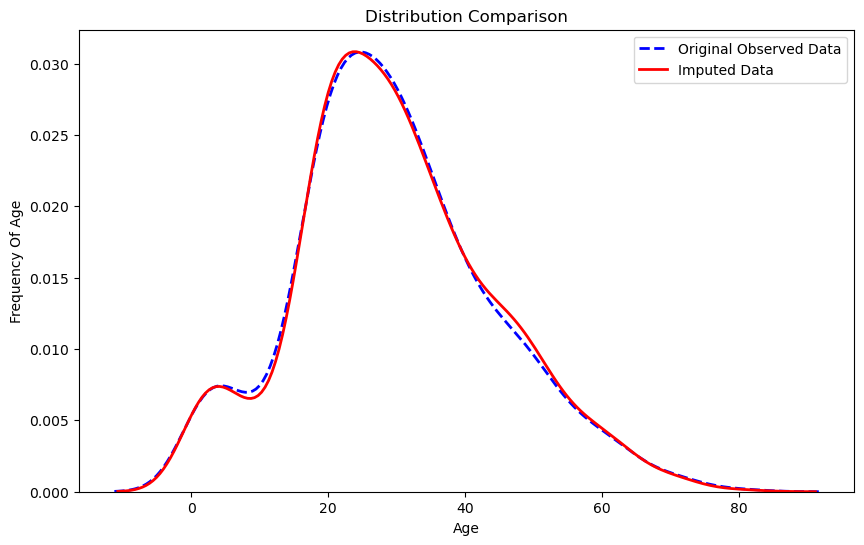

In [11]:
# 3.Visualizing the Age column distribution - before and after imputing

plt.figure(figsize=(10, 6))

# Plot the original data's distribution
sns.kdeplot(df1['Age'].dropna(), label='Original Observed Data', color='blue', linewidth=2, linestyle='--')

# Plot the imputed data's distribution
sns.kdeplot(df_imputed['Age'], label='Imputed Data', color='red', linewidth=2)

plt.title('Distribution Comparison')
plt.xlabel('Age')
plt.ylabel('Frequency Of Age')

plt.legend()
plt.show()

In [12]:
#One hot encoding and standardizing using z scale standardization
df1_final = df_imputed
df1_final.isnull().sum()
df1_final = pd.get_dummies(df1_final,columns = ['Sex','Embarked'])
df1_final = df1_final.astype(int)
df1_final

#Now lets standardize on a z-scale
scaler = StandardScaler()

#fir_transform - for the task of mean
#Then applies the standard deviation
scaled_data = scaler.fit_transform(df1_final)


df1_scaled = pd.DataFrame(scaled_data, columns = df1_final.columns)
df1_scaled

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,-0.786961,-0.541405,0.431350,-0.474326,-0.496733,-0.735342,0.735342,-0.482711,-0.307941,0.616794
1,1.270711,0.562198,0.431350,-0.474326,0.791539,1.359911,-1.359911,2.071634,-0.307941,-1.621287
2,1.270711,-0.265504,-0.475199,-0.474326,-0.496733,1.359911,-1.359911,-0.482711,-0.307941,0.616794
3,1.270711,0.355273,0.431350,-0.474326,0.429213,1.359911,-1.359911,-0.482711,-0.307941,0.616794
4,-0.786961,0.355273,-0.475199,-0.474326,-0.476604,-0.735342,0.735342,-0.482711,-0.307941,0.616794
...,...,...,...,...,...,...,...,...,...,...
884,-0.786961,-0.196529,-0.475199,-0.474326,-0.375957,-0.735342,0.735342,-0.482711,-0.307941,0.616794
885,1.270711,-0.748330,-0.475199,-0.474326,-0.033760,1.359911,-1.359911,-0.482711,-0.307941,0.616794
886,-0.786961,-0.334479,0.431350,2.006119,-0.174665,1.359911,-1.359911,-0.482711,-0.307941,0.616794
887,1.270711,-0.265504,-0.475199,-0.474326,-0.033760,-0.735342,0.735342,2.071634,-0.307941,-1.621287


# Q8

In [13]:
# 3. Initialize PCA model
# n_components specifies the number of principal components to keep
# If None, all components are kept.
pca = PCA(n_components=None)

# 4. Fit PCA to the data and transform it
principal_components = pca.fit_transform(df1_scaled)

# 5. Access results and transformed data
print("Original data shape:", df.shape)
print("Scaled data shape:", df1_scaled.shape)
print("Transformed data shape (principal components):", principal_components.shape)
print("\nPrincipal Components (transformed data):\n", principal_components)

# Explained variance ratio for each component
print("\nExplained variance ratio per principal component:", pca.explained_variance_ratio_)

# Cumulative explained variance ratio
print("Cumulative explained variance ratio:", np.sum(pca.explained_variance_ratio_))

# Principal components (eigenvectors)
print("\nPrincipal Components (eigenvectors):\n", pca.components_)


Original data shape: (891, 12)
Scaled data shape: (889, 10)
Transformed data shape (principal components): (889, 10)

Principal Components (transformed data):
 [[-1.53334352e+00  6.17393426e-01  2.67772250e-01 ... -1.07842806e-01
  -1.67294217e-15 -4.37163568e-17]
 [ 2.93355472e+00 -1.73246012e+00  3.76632611e-01 ...  2.44315817e-01
  -2.23199253e-16 -1.51790162e-16]
 [ 1.43026654e+00  8.70864395e-01 -1.74484348e+00 ...  1.51695716e-01
   1.99079382e-15  5.21271152e-17]
 ...
 [ 1.33694529e+00  1.97788405e+00  1.85378777e-01 ... -9.14680346e-01
  -3.06072095e-15  2.74171720e-16]
 [ 4.21381131e-01 -2.41035102e+00  9.44663379e-01 ...  1.15619696e+00
  -1.99955609e-15  1.96021895e-16]
 [-9.40296821e-01 -2.13709338e+00 -9.05159255e-01 ... -1.92839816e-01
   1.06569864e-14 -2.14240207e-16]]

Explained variance ratio per principal component: [2.75605507e-01 1.90907099e-01 1.40902082e-01 1.24215350e-01
 9.40722497e-02 6.98916063e-02 5.61114246e-02 4.82946798e-02
 5.60747848e-16 0.00000000e+00]

# Q9

In [14]:
#HERE WE WILL KEEP n_component = 5- same code like above - to show the difference in features..
# 3. Initialize PCA model
# n_components specifies the number of principal components to keep
# If None, all components are kept.
pca = PCA(n_components=5)

# 4. Fit PCA to the data and transform it
principal_components = pca.fit_transform(df1_scaled)

# 5. Access results and transformed data
print("Original data shape:", df.shape)
print("Scaled data shape:", df1_scaled.shape)
print("Transformed data shape (principal components):", principal_components.shape)
print("\nPrincipal Components (transformed data):\n", principal_components)

# Explained variance ratio for each component
print("\nExplained variance ratio per principal component:", pca.explained_variance_ratio_)

# Cumulative explained variance ratio
print("Cumulative explained variance ratio:", np.sum(pca.explained_variance_ratio_))

# Principal components (eigenvectors)
print("\nPrincipal Components (eigenvectors):\n", pca.components_)


Original data shape: (891, 12)
Scaled data shape: (889, 10)
Transformed data shape (principal components): (889, 5)

Principal Components (transformed data):
 [[-1.53334352  0.61739343  0.26777225  0.30443557 -0.45898185]
 [ 2.93355472 -1.73246012  0.37663261 -0.80919845 -0.20632153]
 [ 1.43026654  0.8708644  -1.74484348 -0.58154491 -0.73481021]
 ...
 [ 1.33694529  1.97788405  0.18537878  0.50075556  0.40815271]
 [ 0.42138113 -2.41035102  0.94466338 -0.51143877 -1.30072801]
 [-0.94029682 -2.13709338 -0.90515925  2.79790595  1.00637084]]

Explained variance ratio per principal component: [0.27560551 0.1909071  0.14090208 0.12421535 0.09407225]
Cumulative explained variance ratio: 0.8257022892307506

Principal Components (eigenvectors):
 [[ 0.42048668 -0.07102706  0.13131977  0.2274181   0.26037138  0.53383297
  -0.53383297  0.22522051  0.06434755 -0.23784199]
 [-0.00260131 -0.22591906  0.3223268   0.32645526 -0.04929182  0.14636893
  -0.14636893 -0.50279259 -0.26600281  0.60798923]
 [-0

# Q10

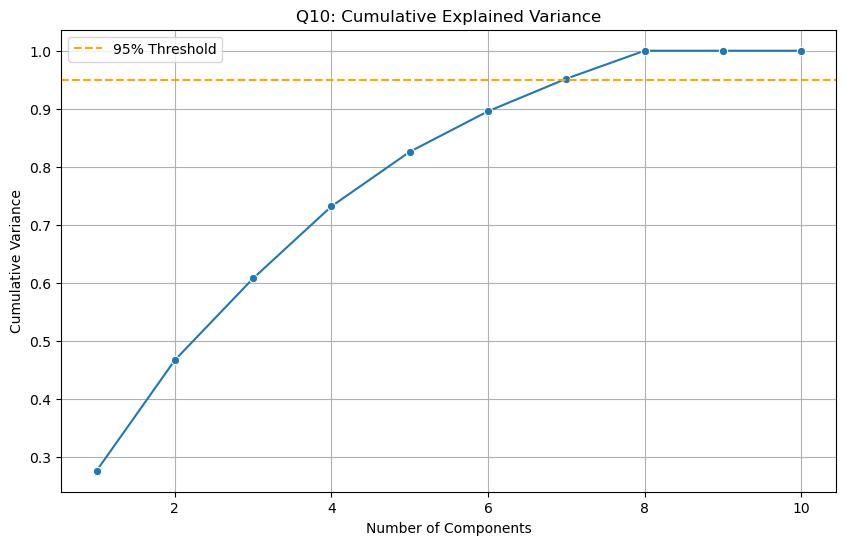

Components needed to keep >95% information: 7


'Variance explained by first 2 components - 80%'

In [24]:
# 1. Re-fit PCA with ALL components
# Crucial:We set n_components=None to get the full variance profile (no dimensionality reduction)
pca_full = PCA(n_components=None)
pca_full.fit(df1_scaled)  # Make sure to use your standardized data (X_scaled)

# 2. Calculate Cumulative Variance
exp_var_ratio = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(exp_var_ratio)

# 3. Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, len(cumulative_variance) + 1), y=cumulative_variance, marker='o')
plt.axhline(y=0.95, color='#FFA500', linestyle='--', label='95% Threshold')
plt.title('Q10: Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.grid(True)
plt.legend()
plt.show()

# 4. Correctly Calculate n for 95%
# We check IF the threshold is ever met to avoid the "1" error
if cumulative_variance[-1] < 0.95:
    print("Warning: Even with all components, 95% variance is not reached (unlikely if n_components=None).")
else:
    n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
    print(f"Components needed to keep >95% information: {n_components_95}")

"Variance explained by first 2 components - 80%"

# Q11

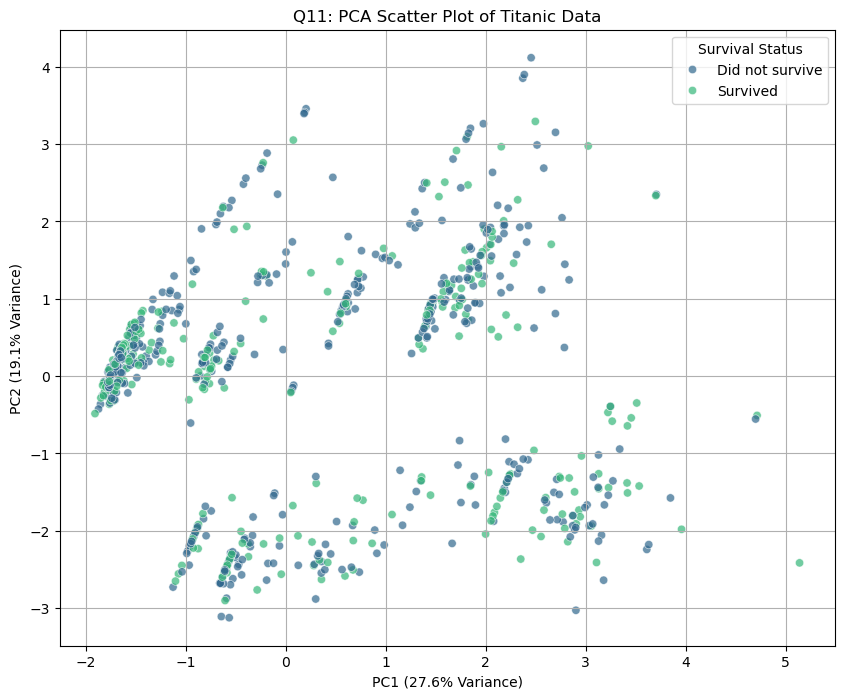

In [25]:

# 1. Running PCA Scatter plot - PCA1 vs PCA2
# We only need the first 2 components for the scatter plot
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df1_scaled)

# 2. Prepare Plotting Data
# Create a DataFrame so seaborn can use it easily
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# 3. Add Readable Target Column (The Fix)
# Get 'Survived' from your ORIGINAL DataFrame (e.g., 'df' or 'y')
survived_values = df['Survived'].values
# Map 0 and 1 to readable strings
pca_df['Survival Status'] = pd.Series(survived_values).map({
    0: 'Did not survive',
    1: 'Survived'
})

# 4. Make the Scatter Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=pca_df,
    x='PC1',
    y='PC2',
    hue='Survival Status',  # Use our new readable column
    palette='viridis',      # Purple/Yellow
    alpha=0.7
)
plt.title('Q11: PCA Scatter Plot of Titanic Data')

# Get variance from the pca object
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} Variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} Variance)')
plt.grid(True)

# The legend will automatically use 'Survival Status' as the title
plt.show()

# Q12

Running t-SNE...


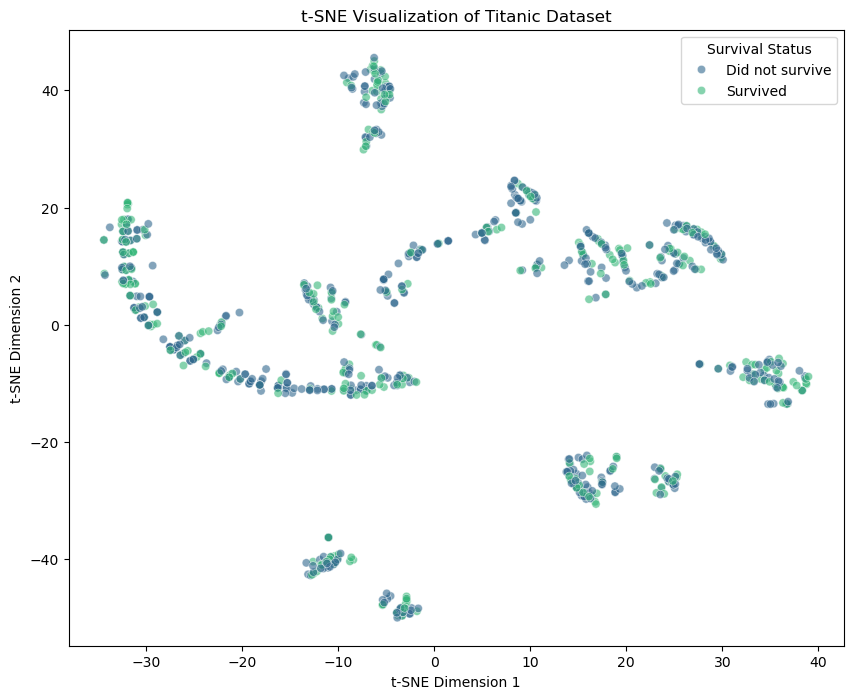

In [26]:
# 1. Run t-SNE plot
print("Running t-SNE...")
tsne = TSNE(n_components=2, perplexity=30, random_state=42, init='pca', learning_rate='auto')
X_tsne = tsne.fit_transform(df1_scaled)

# 2. Prepare Plotting Data
tsne_df = pd.DataFrame(data=X_tsne, columns=['Dim1', 'Dim2'])

# 3. Add Readable Target Column 
# We get 'Survived' from your ORIGINAL DataFrame, not 'df1_scaled'
    # Get the 0/1 values from the original df
survived_values = df['Survived'].values

    # Map 0 -> 'Did not survive', 1 -> 'Survived'
tsne_df['Survival Status'] = pd.Series(survived_values).map({
        0: 'Did not survive',
        1: 'Survived'
    })

# 4. Plotting t-SNE1 vs t-SNE2 plot
plt.figure(figsize=(10, 8))
ax = sns.scatterplot(
    data=tsne_df,
    x='Dim1',
    y='Dim2',
    hue='Survival Status',  
    palette='viridis',      # 'viridis' maps 0(purple) and 1(Green)
    alpha=0.6
)

plt.title('t-SNE Visualization of Titanic Dataset')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

#Plotting Legend - important information.
plt.legend(title='Survival Status')

plt.show()

# Problem 4

# Q13-Q15

Number of training examples after dropping NaN: m = 714
alpha=0.1 final: w_scaled=5.080185, b=34.694514, final loss=1385.341335
alpha=0.1 converted to original units: w_orig=0.349964, b_orig=24.300901


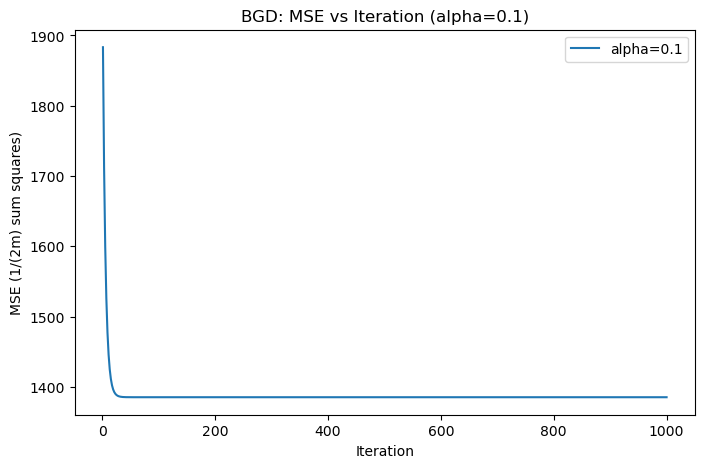

alpha=0.001: final loss=1468.456678, w_orig=0.221284, b_orig=15.365571
alpha=0.01: final loss=1385.341337, w_orig=0.349949, b_orig=24.299852
alpha=0.1: final loss=1385.341335, w_orig=0.349964, b_orig=24.300901
alpha=0.5: final loss=1385.341335, w_orig=0.349964, b_orig=24.300901


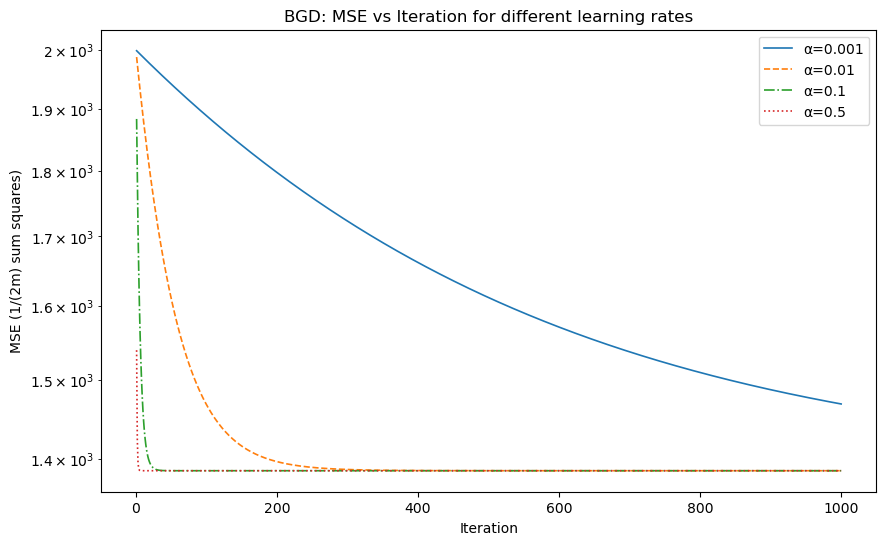

alpha=0.001: w_orig=0.221284, b_orig=15.365571
alpha=0.01: w_orig=0.349949, b_orig=24.299852
alpha=0.1: w_orig=0.349964, b_orig=24.300901
alpha=0.5: w_orig=0.349964, b_orig=24.300901


In [18]:
df_bg = df[['Age','Fare']].dropna().copy()
X = df_bg['Age'].values.astype(float)   # shape (m,)
y = df_bg['Fare'].values.astype(float)  # shape (m,)
m = X.shape[0]
print(f"Number of training examples after dropping NaN: m = {m}")

# Optionally: scale features for numerical stability (we'll center Age to help convergence)
# But because we are asked to use raw Age -> Fare in single-feature model, we'll show both options.
# Here, we will standardize Age (z-score) to make different alphas comparable; but also show interpretation back in original units.
X_mean = X.mean()
X_std = X.std(ddof=0)
X_std_safe = X_std if X_std != 0 else 1.0
X_scaled = (X - X_mean) / X_std_safe

# Use X_scaled for gradient descent (faster and numerically stable)
# We'll remember to convert slope back to original units later.
x = X_scaled
# y we can also center (not necessary), but keep original y for loss scale.
y_vec = y

# Helper: compute MSE (as per problem: 1/(2m) sum (error^2))
def mse_half(w, b, x_arr, y_arr):
    m = x_arr.shape[0]
    preds = w * x_arr + b
    err = preds - y_arr
    return (1.0/(2*m)) * np.sum(err**2)

# Batch gradient descent function
def batch_gradient_descent(x_arr, y_arr, alpha=0.1, n_iters=1000, verbose=False):
    m = x_arr.shape[0]
    w = 0.0
    b = 0.0
    history = np.zeros(n_iters)
    for it in range(n_iters):
        preds = w * x_arr + b
        errors = preds - y_arr
        # gradients
        dw = (1.0/m) * np.sum(errors * x_arr)
        db = (1.0/m) * np.sum(errors)
        # update
        w = w - alpha * dw
        b = b - alpha * db
        history[it] = (1.0/(2*m)) * np.sum((w * x_arr + b - y_arr)**2)
        if verbose and (it % (n_iters//5) == 0):
            print(f"iter {it:4d}: loss={history[it]:.6f}, w={w:.6f}, b={b:.6f}")
    return w, b, history

# Run for alpha = 0.1, n_iter=1000
alpha = 0.1
n_iters = 1000
w0, b0, hist0 = batch_gradient_descent(x, y_vec, alpha=alpha, n_iters=n_iters)
print(f"alpha={alpha} final: w_scaled={w0:.6f}, b={b0:.6f}, final loss={hist0[-1]:.6f}")

# Convert w_scaled (slope on X_scaled) back to slope on original Age:
# If x = (Age - mean)/std, model: pred = w_scaled * x + b = w_scaled*(Age-mean)/std + b
# So in original units: pred = (w_scaled/std)*Age + (b - w_scaled*mean/std)
w_orig = w0 / X_std_safe
b_orig = b0 - (w0 * X_mean / X_std_safe)
print(f"alpha={alpha} converted to original units: w_orig={w_orig:.6f}, b_orig={b_orig:.6f}")

# Plot MSE vs iterations for alpha=0.1
plt.figure(figsize=(8,5))
plt.plot(np.arange(1, n_iters+1), hist0, label=f"alpha={alpha}")
plt.xlabel("Iteration")
plt.ylabel("MSE (1/(2m) sum squares)")
plt.title("BGD: MSE vs Iteration (alpha=0.1)")
plt.legend()
plt.show()

# --- Q15: run multiple alphas and plot on same axes ---
alphas = [0.001, 0.01, 0.1, 0.5]
histories = {}
params = {}
for a in alphas:
    w_a, b_a, hist_a = batch_gradient_descent(x, y_vec, alpha=a, n_iters=n_iters)
    histories[a] = hist_a
    # convert to original units
    w_orig_a = w_a / X_std_safe
    b_orig_a = b_a - (w_a * X_mean / X_std_safe)
    params[a] = (w_a, b_a, w_orig_a, b_orig_a)
    print(f"alpha={a}: final loss={hist_a[-1]:.6f}, w_orig={w_orig_a:.6f}, b_orig={b_orig_a:.6f}")

# Plotting all histories with different line styles/markers
plt.figure(figsize=(10,6))
linestyles = ['-', '--', '-.', ':']
markers = ['o', 's', 'd', '^']
for (a, ls, mk) in zip(alphas, linestyles, markers):
    plt.plot(np.arange(1, n_iters+1), histories[a], label=f"α={a}", linestyle=ls, linewidth=1.2)
plt.xlabel("Iteration")
plt.ylabel("MSE (1/(2m) sum squares)")
plt.title("BGD: MSE vs Iteration for different learning rates")
plt.legend()
plt.yscale('log')  # use log scale to compare convergence rates across wide ranges
plt.show()

# Print final weights in original units for each alpha
for a in alphas:
    w_s, b_s, w_o, b_o = params[a]
    print(f"alpha={a}: w_orig={w_o:.6f}, b_orig={b_o:.6f}")

#Problem 5

###Q16-Q17

In our written portion.

# Problem 6

# Q18

Real dataset preview:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Synthetic dataset preview:


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,2,female,48.276703,3,1,9.17,S
1,0,3,male,30.294054,0,0,5.52,S
2,1,3,male,39.547342,2,0,50.59,S
3,1,3,female,25.656265,1,1,61.29,C
4,0,1,male,34.538329,1,1,1.60,S


=== REAL NUMERIC SUMMARY ===


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


=== SYNTHETIC NUMERIC SUMMARY ===


,Survived,Pclass,Age,SibSp,Parch,Fare
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.485000,2.290000,29.955540,0.600000,0.490000,53.421050
std,0.501029,0.818075,13.797739,0.715935,0.729769,54.479155
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.250000
25%,0.000000,2.000000,19.343391,0.000000,0.000000,14.032500
50%,0.000000,3.000000,29.638023,0.000000,0.000000,37.625000
75%,1.000000,3.000000,38.752467,1.000000,1.000000,67.265000
max,1.000000,3.000000,73.104331,3.000000,4.000000,372.090000


=== REAL CATEGORICAL SUMMARY ===


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


=== SYNTHETIC CATEGORICAL SUMMARY ===


,Sex,Embarked
count,200,200
unique,2,3
top,male,S
freq,123,148


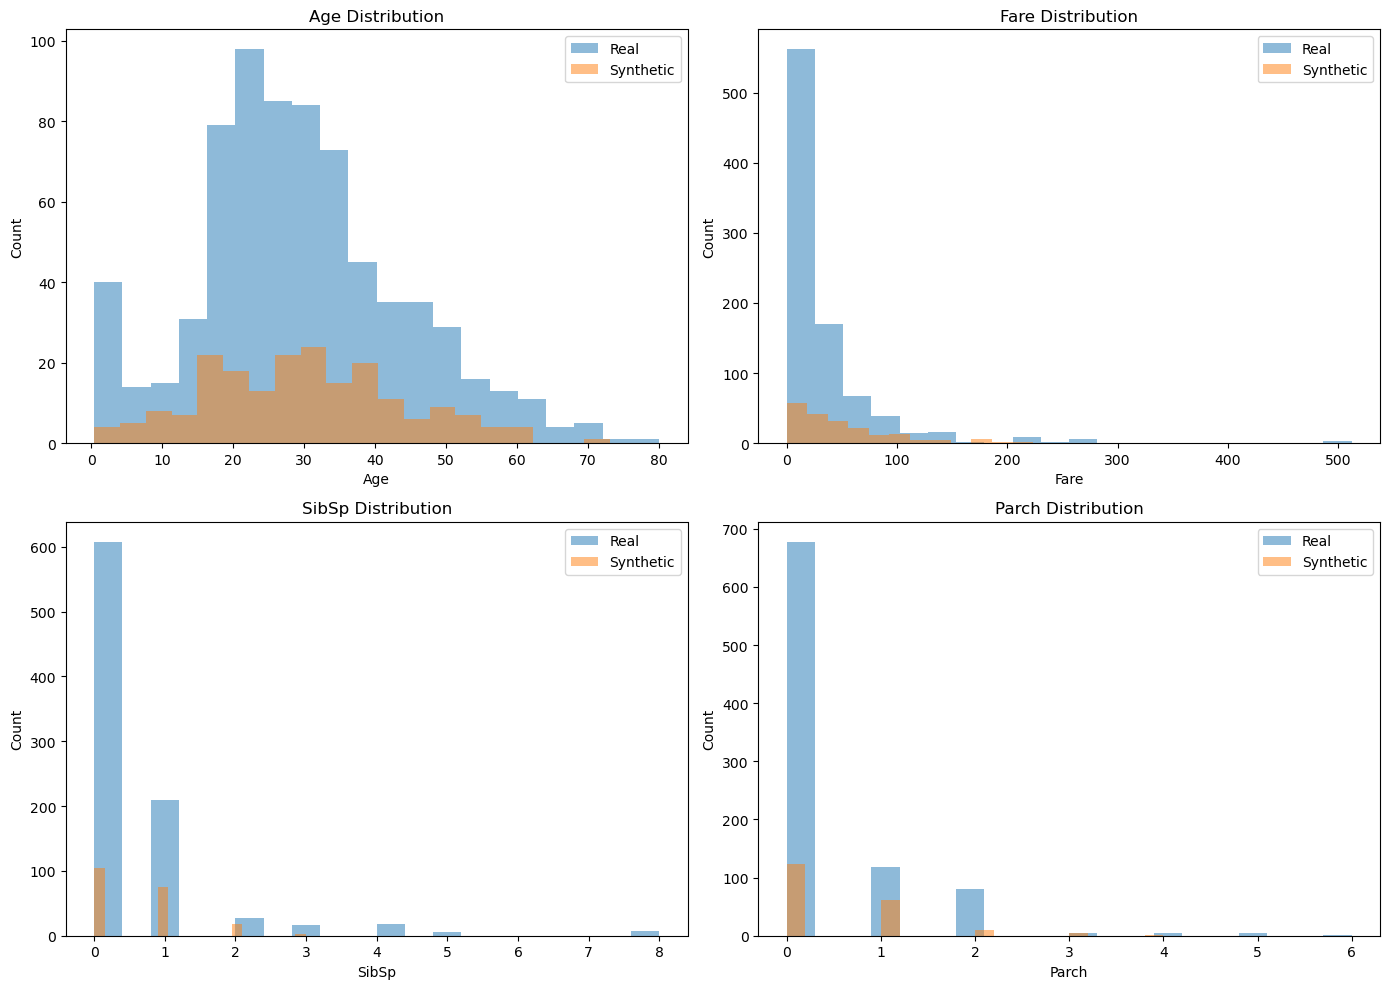

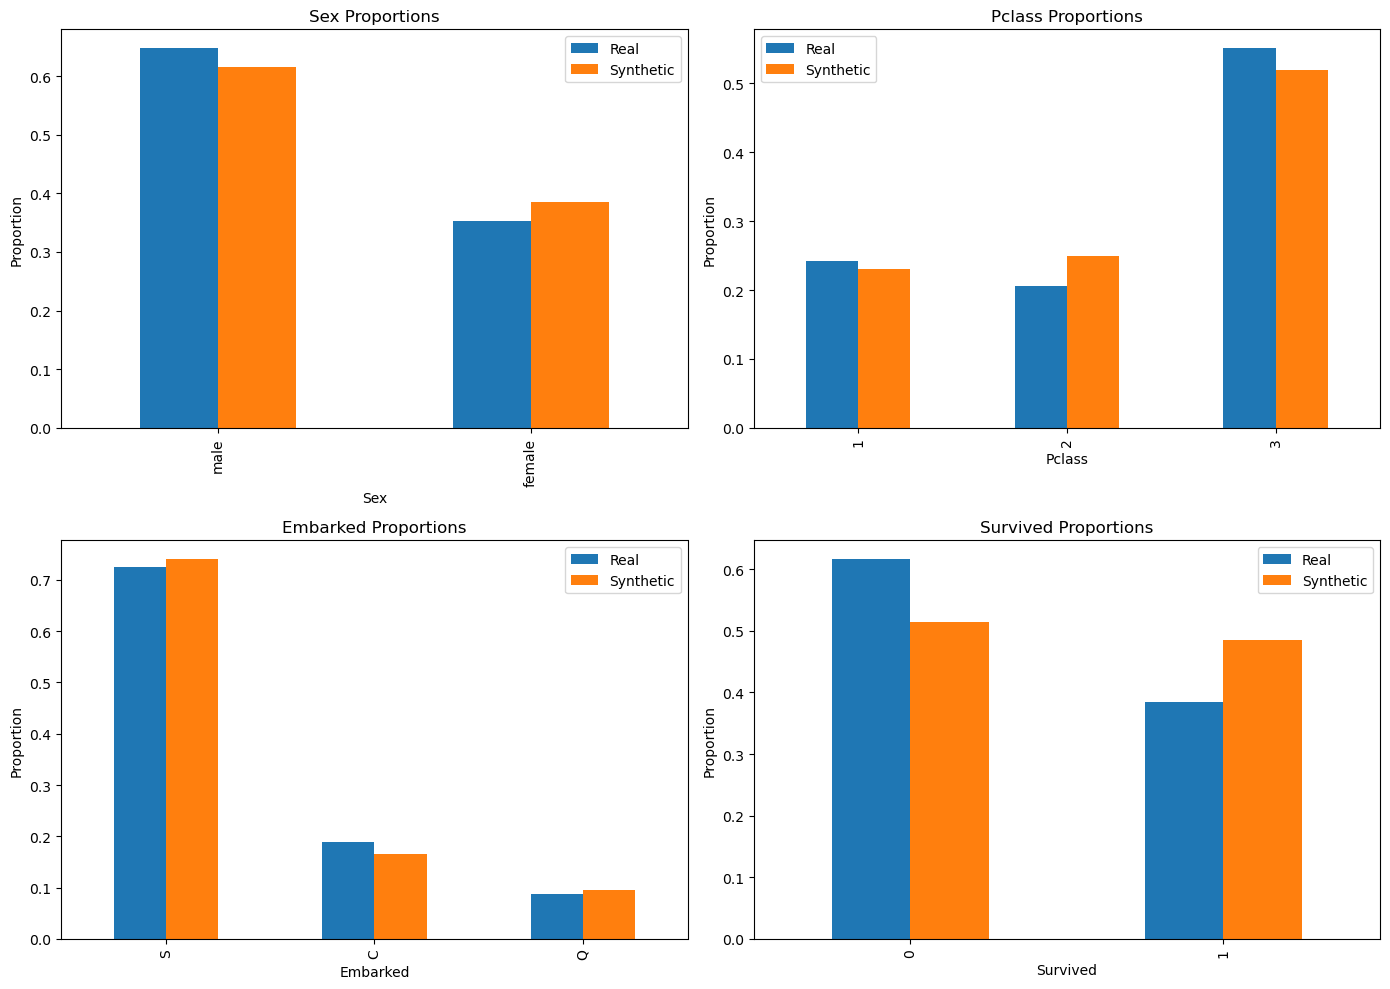

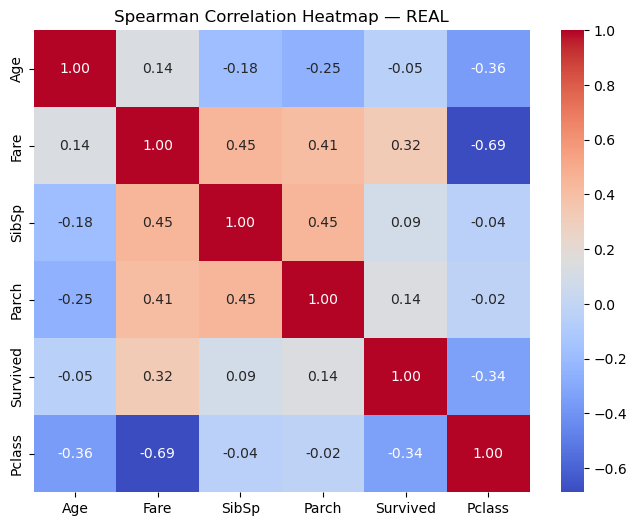

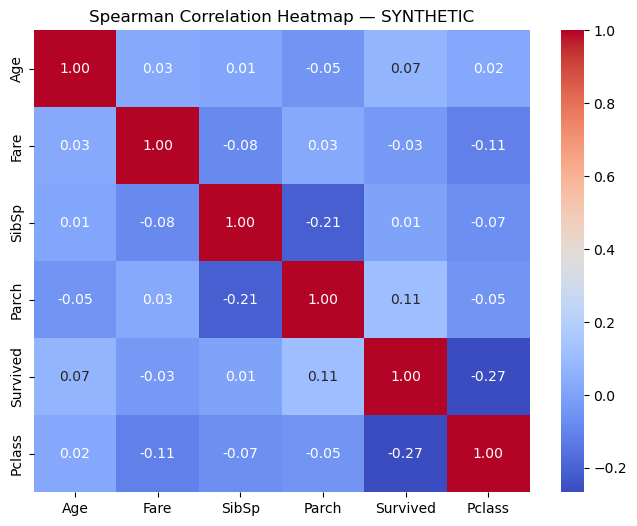

In [19]:
real = df.copy()
synthetic = pd.read_csv("./synthetic_titanic.csv")

print("Real dataset preview:")
display(real.head())

print("Synthetic dataset preview:")
display(synthetic.head())

# ----------------------------
# Summary Statistics
# ----------------------------

print("=== REAL NUMERIC SUMMARY ===")
display(real.describe())

print("=== SYNTHETIC NUMERIC SUMMARY ===")
display(synthetic.describe())

print("=== REAL CATEGORICAL SUMMARY ===")
display(real.describe(include='object'))

print("=== SYNTHETIC CATEGORICAL SUMMARY ===")
display(synthetic.describe(include='object'))


# Combined 2×2 Numerical Comparison Plots (Original Dataset vs New Dataset)


fig, axes = plt.subplots(2, 2, figsize=(14, 10))
num_cols = ["Age", "Fare", "SibSp", "Parch"]

for ax, col in zip(axes.flatten(), num_cols):
    ax.hist(real[col], bins=20, alpha=0.5, label="Real")
    ax.hist(synthetic[col], bins=20, alpha=0.5, label="Synthetic")
    ax.set_title(f"{col} Distribution")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    ax.legend()

plt.tight_layout()
plt.show()


# Combined 2×2 Categorical Comparison Plots (Original Dataset vs New Dataset)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
cat_cols = ["Sex", "Pclass", "Embarked", "Survived"]

for ax, col in zip(axes.flatten(), cat_cols):
    real_counts = real[col].value_counts(normalize=True)
    synth_counts = synthetic[col].value_counts(normalize=True)

    compare_df = pd.DataFrame({"Real": real_counts, "Synthetic": synth_counts})
    compare_df.plot(kind="bar", ax=ax)

    ax.set_title(f"{col} Proportions")
    ax.set_ylabel("Proportion")

plt.tight_layout()
plt.show()


# Correlation Matrices (Spearman)


# Real dataset correlations
numeric_real = real[["Age","Fare","SibSp","Parch","Survived","Pclass"]]
corr_real = numeric_real.corr(method='spearman')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_real, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Spearman Correlation Heatmap — REAL")
plt.show()

# Synthetic dataset correlations
numeric_synth = synthetic[["Age","Fare","SibSp","Parch","Survived","Pclass"]]
corr_synth = numeric_synth.corr(method='spearman')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_synth, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Spearman Correlation Heatmap — SYNTHETIC")
plt.show()


# Q19

In our written portion.